Group Members:
Olivia Bene,
Parth Ghayal,
Gia Bach Nguyen,
Karan Vyas

What percentage of survey respondents were on an individualized education plan (IEP) while in school?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['phase1_checkbox_data.csv']))

df.head()


Saving phase1_checkbox_data.csv to phase1_checkbox_data.csv


,PDF Number,1,2,8,9,10,11,18,19,20,...,60.3,61.1,61.2,61.3,62.1,62.2,62.3,63.1,63.2,63.3
0,3.0,County Jail,Detained,White,Female,No,Straight (Heterosexual),No,No,"Parent,Other Family Member,Other:",...,a few times,never,never,a few times,no,no,yes,NaN,NaN,out-of-school
1,71.0,County Jail,Sentenced,White,Female,No,Bisexual,No,Yes,"Parent,Other Family Member",...,often,never,often,often,no,no,yes,NaN,"in-school, out-of-school","in-school, out-of-school"
2,72.0,County Jail,Detained,Latinx,Female,No,Straight (Heterosexual),No,No,"Parent,Other Family Member,Other:",...,never,never,never,never,no,no,no,NaN,NaN,NaN
3,73.0,State Prison,Detained,White,Female,No,Straight (Heterosexual),No,No,"Parent,Other Family Member",...,a few times,neve,never,once,no,no,no,NaN,NaN,"in-school, out-of-school"
4,2.0,County Jail,Sentenced,"Black/African American,White,Latinx",Male,No,Straight (Heterosexual),Yes,No,Other Family Member,...,once,never,never,a few times,no,no,yes,NaN,NaN,out-of-school


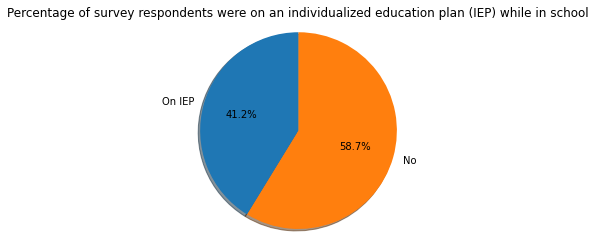

In [ ]:
from itertools import count
count_yes = 0
count_no = 0
for i in range(len(df['33'])):
  if df['33'][i] == 'No - I was never on an IEP in school' :
    count_no += 1
  elif df['33'][i] == 'Yes':
    count_yes += 1
x_axis = [count_yes, count_no]
labels = ['On IEP', 'No']
plt.pie(x_axis, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of survey respondents were on an individualized education plan (IEP) while in school')
plt.axis('equal')
plt.show()


What percentage of survey respondents experienced a home removal, separated by race, gender, and sexual orientation?

Saving Final_new_phase1.csv to Final_new_phase1.csv


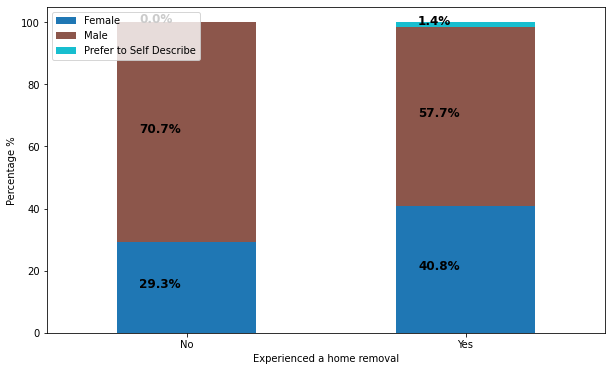

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Final_new_phase1.csv']))

def plot_stacked_bar_graph (cross_tab_prop, x_label, y_label):
    cross_tab_prop.plot(kind='bar',
                        stacked=True,
                        colormap='tab10',
                        figsize=(10, 6))
    plt.legend(loc="upper left", ncol=1)
    plt.xticks(rotation=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    for n, x in enumerate([*cross_tab_prop.index.values]):
        for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                       cross_tab_prop.loc[x].cumsum()):

            plt.text(x=n - 0.17,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{np.round(proportion, 1)}%',
                     color="black",
                     fontsize=12,
                     fontweight="bold")

    plt.show()
    return

df['29'].replace("Yes,No", "No", inplace = True)
#home removal by gender
df['9'].replace("Prefer to Self Describe:", "Prefer to Self Describe", inplace = True)
cross_tab_prop = pd.crosstab(index=df['29'],columns=df['9'],normalize="index").mul(100).round(1)
plot_stacked_bar_graph(cross_tab_prop,"Experienced a home removal","Percentage %")

<ipython-input-2-d55c9d71d772>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['11'][i] = "Others"


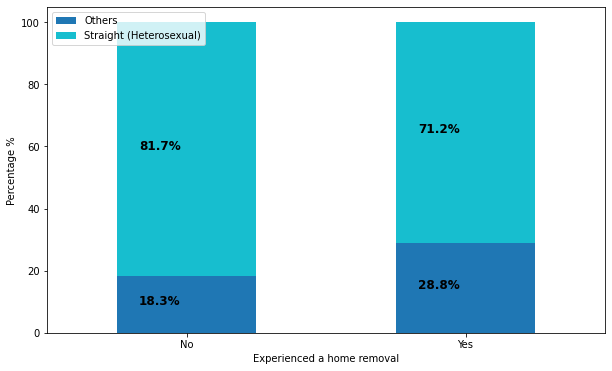

In [ ]:
#home removal by sexual orientations
for i in range(len(df['11'])):
    if df['11'][i] != "Straight (Heterosexual)":
        df['11'][i] = "Others"
cross_tab_prop = pd.crosstab(index=df['29'],columns=df['11'],normalize="index").mul(100).round(1)
plot_stacked_bar_graph(cross_tab_prop,"Experienced a home removal","Percentage %")

<ipython-input-3-ff98eda4780c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['8'][i] = "Mixed"


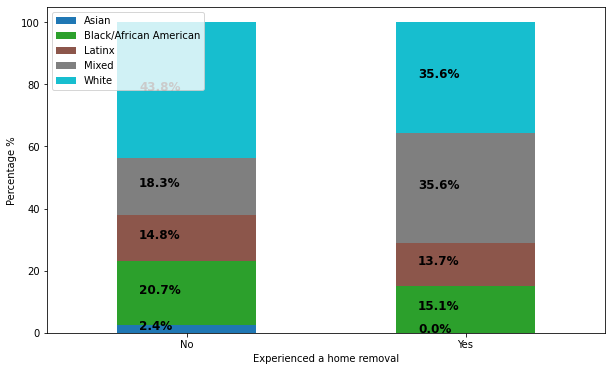

In [ ]:
#home removal by races
for i in range(len(df['8'])):
    if df['8'][i] not in ["White","Black/African American","Asian","Latinx"]:
        df['8'][i] = "Mixed"
cross_tab_prop = pd.crosstab(index=df['29'],columns=df['8'],normalize="index").mul(100).round(1)
plot_stacked_bar_graph(cross_tab_prop,"Experienced a home removal","Percentage %")

Mental Health & the Pipline

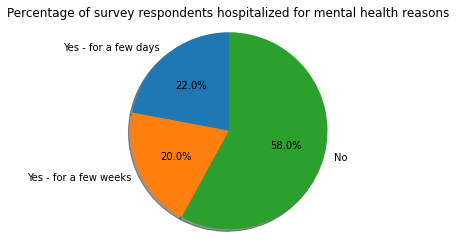

In [ ]:
from itertools import count
yes_days = 0
yes_weeks = 0
no = 0
for i in range(len(df['43'])):
  if df['43'][i] == 'No' :
    no += 1
  elif df['43'][i] == 'Yes - for a few days':
    yes_days += 1
  elif df['43'][i] == 'Yes - for a few weeks':
    yes_weeks += 1
x_axis = [yes_days, yes_weeks, no]
labels = ['Yes - for a few days','Yes - for a few weeks' ,'No']
plt.pie(x_axis, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of survey respondents hospitalized for mental health reasons')
plt.axis('equal')
plt.show()

Factors Living with Under 18

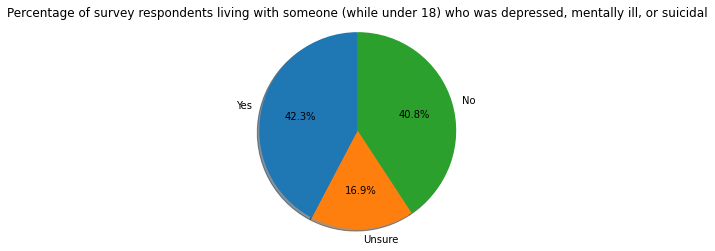

In [ ]:
from itertools import count
yes = 0
unsure = 0
no = 0
for i in range(len(df['23'])):
  if df['23'][i] == 'No' :
    no += 1
  elif df['23'][i] == 'Yes':
    yes += 1
  elif df['23'][i] == "I don't know":
    unsure += 1
x_axis = [yes, unsure, no]
labels = ['Yes','Unsure' ,'No']
plt.pie(x_axis, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of survey respondents living with someone (while under 18) who was depressed, mentally ill, or suicidal')
plt.axis('equal')
plt.show()

Live with those who drank too much

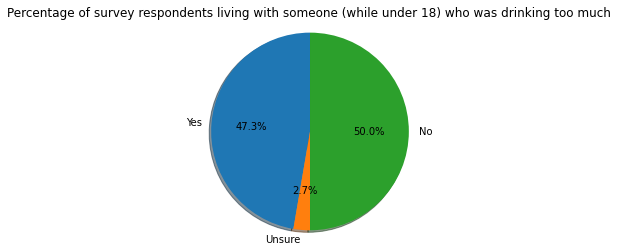

In [ ]:
from itertools import count
yes = 0
unsure = 0
no = 0
for i in range(len(df['24'])):
  if df['24'][i] == 'No' :
    no += 1
  elif df['24'][i] == 'Yes':
    yes += 1
  elif df['24'][i] == "I don't know":
    unsure += 1
x_axis = [yes, unsure, no]
labels = ['Yes','Unsure' ,'No']
plt.pie(x_axis, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of survey respondents living with someone (while under 18) who was drinking too much')
plt.axis('equal')
plt.show()

Living with a drug user

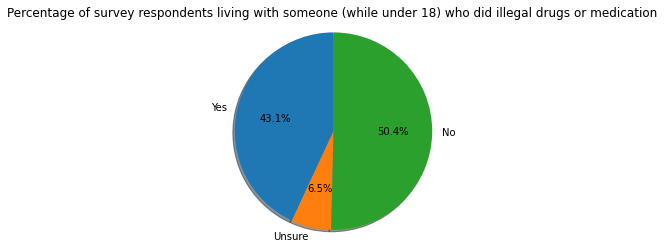

In [ ]:
from itertools import count
yes = 0
unsure = 0
no = 0
for i in range(len(df['25'])):
  if df['25'][i] == 'No' :
    no += 1
  elif df['25'][i] == 'Yes':
    yes += 1
  elif df['25'][i] == "I don't know":
    unsure += 1
x_axis = [yes, unsure, no]
labels = ['Yes','Unsure' ,'No']
plt.pie(x_axis, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of survey respondents living with someone (while under 18) who did illegal drugs or medication')
plt.axis('equal')
plt.show()

Living with those who served time

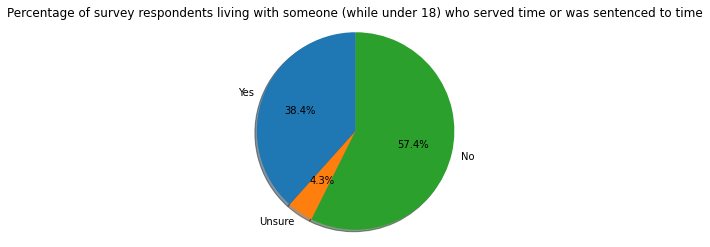

In [ ]:
from itertools import count
yes = 0
unsure = 0
no = 0
for i in range(len(df['26'])):
  if df['26'][i] == 'No' :
    no += 1
  elif df['26'][i] == 'Yes':
    yes += 1
  elif df['26'][i] == "I don't know":
    unsure += 1
x_axis = [yes, unsure, no]
labels = ['Yes','Unsure' ,'No']
plt.pie(x_axis, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of survey respondents living with someone (while under 18) who served time or was sentenced to time')
plt.axis('equal')
plt.show()

In home violence

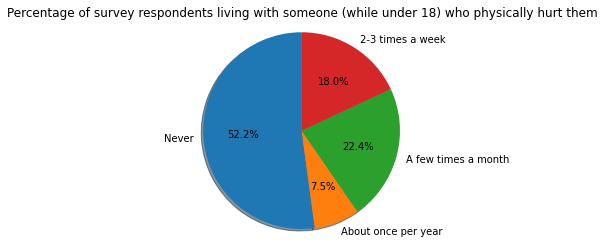

In [ ]:
from itertools import count
never = 0
year = 0
month = 0
week = 0
for i in range(len(df['27'])):
  if df['27'][i] == 'Never' :
    never += 1
  elif df['27'][i] == 'About once per year':
    year += 1
  elif df['27'][i] == 'A few times a month':
    month += 1
  elif df['27'][i] == '2-3 times a week':
    week += 1
x_axis = [never, year, month, week]
labels = ['Never','About once per year','A few times a month','2-3 times a week']
plt.pie(x_axis, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of survey respondents living with someone (while under 18) who physically hurt them')
plt.axis('equal')
plt.show()

Mental Health Diagnosis

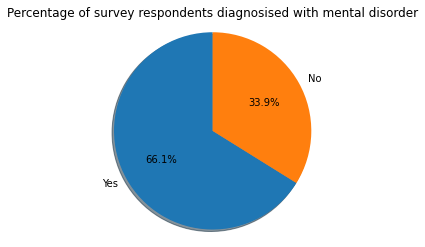

In [ ]:
from itertools import count
yes = 0
no = 0
for i in range(len(df['39'])):
  if df['39'][i] == 'No' :
    no += 1
  elif df['39'][i] == 'Yes':
    yes += 1
x_axis = [yes, no]
labels = ['Yes','No']
plt.pie(x_axis, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of survey respondents diagnosed with mental disorder')
plt.axis('equal')
plt.show()

Diagnosed with mental disorder by race

Saving Final_new_phase1.csv to Final_new_phase1 (1).csv


<ipython-input-3-92eab56e7a54>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['8'][i] = "Mixed"


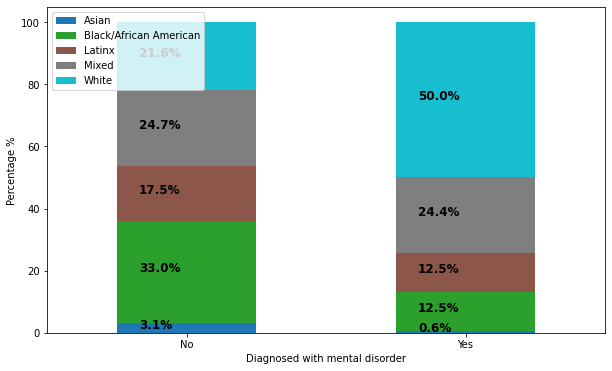

In [ ]:
#mental disorder by races
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Final_new_phase1.csv']))


def plot_stacked_bar_graph (cross_tab_prop, x_label, y_label):
    cross_tab_prop.plot(kind='bar',
                        stacked=True,
                        colormap='tab10',
                        figsize=(10, 6))
    plt.legend(loc="upper left", ncol=1)
    plt.xticks(rotation=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    for n, x in enumerate([*cross_tab_prop.index.values]):
        for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                       cross_tab_prop.loc[x].cumsum()):

            plt.text(x=n - 0.17,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{np.round(proportion, 1)}%',
                     color="black",
                     fontsize=12,
                     fontweight="bold")

    plt.show()
    return

df['39'].fillna("No", inplace=True)
for i in range(len(df['8'])):
    if df['8'][i] not in ["White","Black/African American","Asian","Latinx"]:
        df['8'][i] = "Mixed"
cross_tab_prop = pd.crosstab(index=df['39'],columns=df['8'],normalize="index").mul(100).round(1)
plot_stacked_bar_graph(cross_tab_prop,"Diagnosed with mental disorder","Percentage %")

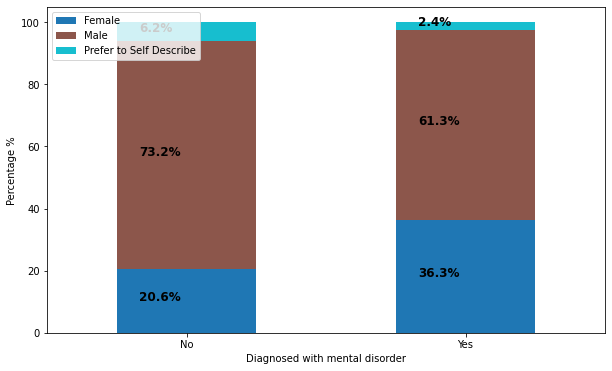

In [ ]:
#Mental disorder by gender
df['9'] = df['9'].fillna('Prefer to Self Describe:')
df['9'].replace("Prefer to Self Describe:", "Prefer to Self Describe", inplace = True)

cross_tab_prop = pd.crosstab(index=df['39'],columns=df['9'],normalize="index").mul(100).round(1)
plot_stacked_bar_graph(cross_tab_prop,"Diagnosed with mental disorder","Percentage %")

Mental Disorder by Gender

In [ ]:
import numpy as np
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap
!pip install geopandas
import geopandas as gpd


#Boston
default_location = [42.3601, 71.0589]

map = folium.Map(location = default_location, zoom_start = 12)

#gather the zips
#zip code to same as my df
geo = gpd.read_file('phase1_checkbox_data.csv')
geo = geo.to_crs("EPSG:2249")

df[7]=df[7].astype(str) #change to type int
geojson[7]=geojson[7].astype(str)
df_merged = df.merge(geojson, on=[7]) #merge both

df_merged.head()
# sample data sync
geojson = geojson[geojson[7].isin(df[7])]

#Add datapoints
heatmap = HeatMap(data = zip)

# Plot it on the map
heatmap.add_to(map)

# Display the map
map


Desion tree Data Data collection

Saving Final.csv to Final (9).csv
[nan, ' Anxiety, PTSD , Mood , deppression , Add/ADHD No Insomnia ', 'All PTST, bipolar, persmaliyesord', ' depression, anxiety ', ' anxiety depression', 'All of them', ' all of them plus others ', 'PTSD, Manic/Depression ', ' Depression, High Anxiety, PISD, ADD ', ' Agoraphobia and Bipolar disorder ', 'Depression Anxiety', 'Add/Adhd, Mood disorder, ptsd, depression and Anxiety ', 'Anxiety 110', 'PTSD, Depression', 'PTSD, depression, anxiety, mood disorder (bipolar) ', ' depression, PTSD ', 'depression anxiety, Attachment disorder, ocd, PTSD,ADD,OPD, ', ' anxiety, Mood disorder ', ' depression, PTSD, anxiety ', ' No ', ' DEPRESSION, ANXITEY PTSP ', ' all The ABOVE ', 'depression , PTSD 80HD', ' anxiety, PTSD, Broadline personality disordered,', ' FTSD, Depression, anxiety', ' mood disorder , Anxiety, PTSD ', 'Depression ', ' depression and anxiety ', ' BipolarMayor Depression disonder ptsd ', ' Depression and PTSD', 'Depression, anxiety', 'pscso effect

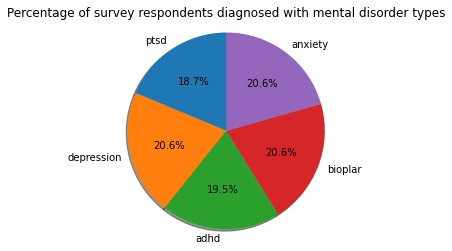

In [ ]:
import re
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Final.csv']))

#get list of illnesses in 39_text
from itertools import count
yes_group = df.groupby(['39']).apply(list)
list39 = []
for i in range(len(df['39'])):
  if df['39'][i] != 'No' :
   list39.append(df['39_text'][i])

print(list39)

#categorize
sublist = ['ptsd', 'depression', 'adhd', 'bioplar', 'anxiety']

def filter(string, substr):
    return [str for str in string if
             any(sub in str for sub in substr)]

list_39 = [str(i).lower() for i in list39]
#print(filter(list_39,sublist))

ptsd = filter(list_39, "ptsd")
depress = filter(list_39, "depression")
adhd = filter(list_39, "adhd")
anxiety = filter(list_39, "anxiety")
bipolar = filter(list_39, "bipolar")

x_axis = [len(ptsd), len(depress), len(adhd), len(anxiety), len(bipolar)]
labels = ['ptsd', 'depression', 'adhd', 'bioplar', 'anxiety']
plt.pie(x_axis, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of survey respondents diagnosed with mental disorder types')
plt.axis('equal')
plt.show()

Question 6: Where are the most respondents come from?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io
import json
from google.colab import files
uploaded = files.upload()
df_zc = pd.read_csv(io.BytesIO(uploaded['question6.csv']))

In [ ]:
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import folium
from folium.plugins import HeatMap

"""
code = df['7'].value_counts().index.to_list()
count = df['7'].value_counts().to_list()
zip_code=[ (x,y) for x,y in zip(code, count)]
#print(zip_code)
df_zc = pd.DataFrame(zip_code,columns=['code', 'count'])

##covert code from int to string to extract lat and lon
df_zc['code'] = df_zc['code'].astype('int64').astype('string')
##add leading zeros if the len(code) < 5
df_zc['code'] = df_zc['code'].str.zfill(5)
import pgeocode
import plotly.graph_objects as go

nomi = pgeocode.Nominatim('us')



df_zc['Latitude'] = (nomi.query_postal_code(df_zc['code'].tolist()).latitude)
df_zc['Longitude'] = (nomi.query_postal_code(df_zc['code'].tolist()).longitude)
#print(df_zc)
"""
m = folium.Map(location=[42.4072, -71.3824])



folium.Choropleth(
            geo_data="ma.json",
             data=df_zc, # my dataset
             columns=['code','count'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.ZCTA5CE10', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
             nan_fill_color = 'Greys',
             #nan_fill_opacity='YlOrRd',
             legend_name='Respondent').add_to(m)

folium.LayerControl().add_to(m)
#m.save("heat_map.html")
m

FileNotFoundError: ignored

link the the html file: https://github.com/GiaNguyen00/CS506-project-question_6.git



2. What percentage of survey respondents experienced school discipline (suspension/expulsion) while in school separated by race, gender, and sexual orientation?

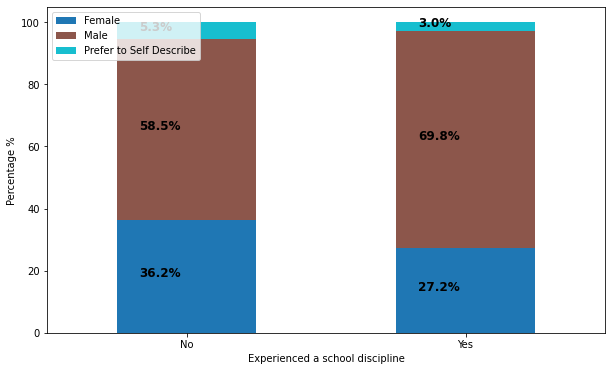

In [ ]:
#school discipline by genders:
#data cleaning
df['61.1'].fillna("never", inplace=True)
df['61.2'].fillna("never", inplace=True)
df['61.3'].fillna("never", inplace=True)
df['62.1'].fillna("no", inplace=True)
df['62.2'].fillna("no", inplace=True)
df['62.3'].fillna("no", inplace=True)

##data grouping
#suspended more than once
df['61.1'].replace([" A few times","A few times","A few timesNo","Often","Yes","a few times","often"],1 , inplace = True)
df['61.2'].replace([" A few times","A few times","A few timesNo","Often","Yes","a few times","often","Once ","once "],1 , inplace = True)
df['61.3'].replace([" A few times","A few times","A few timesNo","Often","Yes","a few times","often"],1 , inplace = True)
#suspended less than once
df['61.1'].replace(["Never","Once","never","once","never ","No","neve"],0, inplace = True)
df['61.2'].replace(["Never","Once","never","once","never ","No"],0, inplace = True)
df['61.3'].replace(["Never","Once","never","once","never "],0, inplace = True)

df['62.1'].replace(["Yes","Yes, I fought to get back in","yes"],1, inplace = True)
df['62.2'].replace(["Yes","Yes, I fought to get back in","yes"," Yes"],1, inplace = True)
df['62.3'].replace(["Yes","Yes, I fought to get back in","yes"],1, inplace = True)

df['62.1'].replace(["NO","No","almost","no","no "],0, inplace = True)
df['62.2'].replace(["NO","No","almost","no"],0, inplace = True)
df['62.3'].replace(["NO","No","almost","no"],0, inplace = True)


df['9'] = df['9'].fillna('Prefer to Self Describe:')
df['9'].replace("Prefer to Self Describe:", "Prefer to Self Describe", inplace = True)
conditions_for_61 = ((df['61.1'] == 1) | (df['61.1'] == 0)) & ((df['61.2'] == 1) | (df['61.2'] == 0)) & ((df['61.3'] == 1) \
    | (df['61.3'] == 0))
conditions_for_62 = ((df['62.1'] == 1) | (df['62.1'] == 0)) & ((df['62.2'] == 1) | (df['62.2'] == 0)) & ((df['62.3'] == 1) \
    | (df['62.3'] == 0))
new_df = df[conditions_for_61 & conditions_for_61].reset_index()
arr = []
for i in range(len(new_df['9'])):
    if (new_df['61.1'][i] == 1) | (new_df['61.2'][i] == 1) | (new_df['61.3'][i] == 1) \
    | (new_df['62.1'][i] == 1) | (new_df['62.2'][i] == 1) | (new_df['62.3'][i] == 1):
        arr.append("Yes")
    else:
        arr.append("No")
new_df['school_discipline'] = arr
cross_tab_prop = pd.crosstab(index=new_df['school_discipline'],columns=new_df['9'],normalize="index").mul(100).round(1)
plot_stacked_bar_graph(cross_tab_prop,"Experienced a school discipline","Percentage %")

<ipython-input-9-01ed8c60fb94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['11'][i] = "Others"


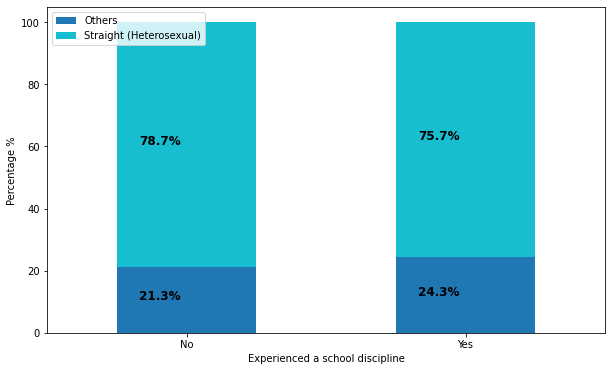

In [ ]:
#school discipline by sexual orientations
for i in range(len(df['11'])):
    if df['11'][i] != "Straight (Heterosexual)":
        df['11'][i] = "Others"
cross_tab_prop = pd.crosstab(index=new_df['school_discipline'],columns=new_df['11'],normalize="index").mul(100).round(1)
plot_stacked_bar_graph(cross_tab_prop,"Experienced a school discipline","Percentage %")

<ipython-input-10-646705ade7e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['8'][i] = "Mixed"


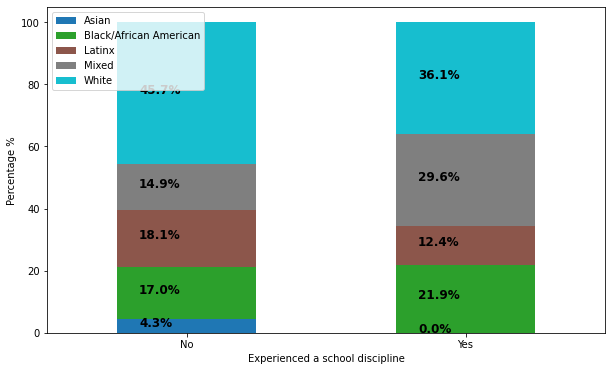

In [ ]:
#school discipline by races
for i in range(len(df['8'])):
    if df['8'][i] not in ["White","Black/African American","Asian","Latinx"]:
        df['8'][i] = "Mixed"
cross_tab_prop = pd.crosstab(index=new_df['school_discipline'],columns=new_df['8'],normalize="index").mul(100).round(1)
plot_stacked_bar_graph(cross_tab_prop,"Experienced a school discipline","Percentage %")

What percentage of survey respondents answered yes to "arrested before age 18" separated by race, gender, and sexual orientation?

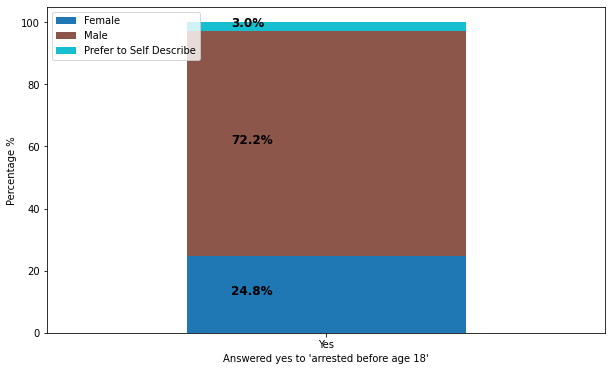

In [ ]:
df['47'].replace("Yes,No","Yes",inplace = True)

#arrested by gender
df['9'] = df['9'].fillna('Prefer to Self Describe:')
df['9'].replace("Prefer to Self Describe:", "Prefer to Self Describe", inplace = True)
new_df = df[df['47'] == "Yes"]
cross_tab_prop = pd.crosstab(index=new_df['47'],columns=new_df['9'],normalize="index").mul(100).round(1)
plot_stacked_bar_graph(cross_tab_prop,"Answered yes to 'arrested before age 18'","Percentage %")

<ipython-input-13-a4778aaa7e9e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['11'][i] = "Others"


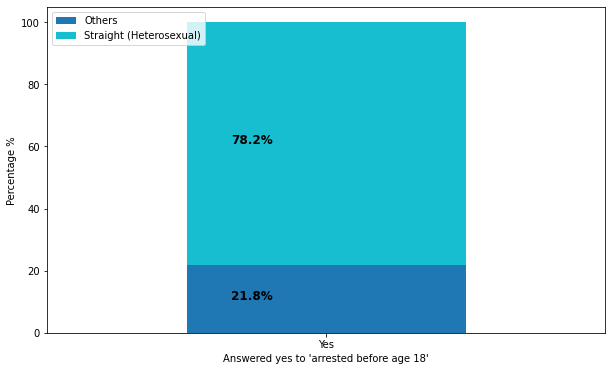

In [ ]:
#arrested by sexual orientations
for i in range(len(df['11'])):
    if df['11'][i] != "Straight (Heterosexual)":
        df['11'][i] = "Others"
new_df = df[df['47'] == "Yes"]
cross_tab_prop = pd.crosstab(index=new_df['47'],columns=new_df['11'],normalize="index").mul(100).round(1)
plot_stacked_bar_graph(cross_tab_prop,"Answered yes to 'arrested before age 18'","Percentage %")

<ipython-input-14-7f41ad38bb42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['8'][i] = "Mixed"


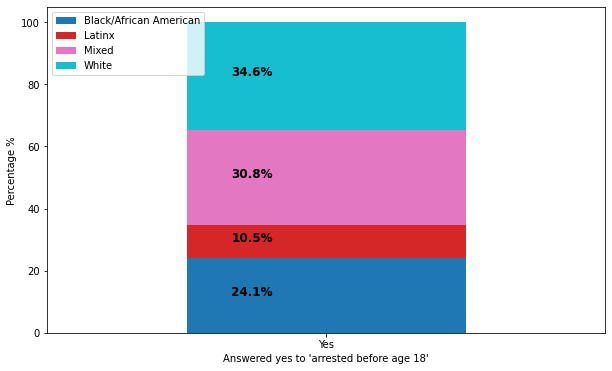

In [ ]:
#arrested by races
for i in range(len(df['8'])):
    if df['8'][i] not in ["White","Black/African American","Asian","Latinx"]:
        df['8'][i] = "Mixed"
new_df = df[df['47'] == "Yes"]
cross_tab_prop = pd.crosstab(index=new_df['47'],columns=new_df['8'],normalize="index").mul(100).round(1)
plot_stacked_bar_graph(cross_tab_prop,"Answered yes to 'arrested before age 18'","Percentage %")

Expolaration:

<ipython-input-15-08be5baf75ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['8'][i] = "Mixed"


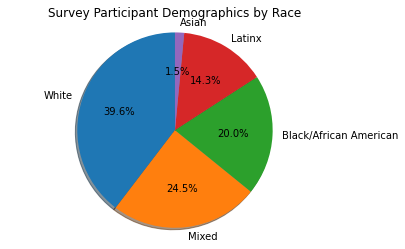

In [ ]:
for i in range(len(df['8'])):
    if df['8'][i] not in ["White","Black/African American","Asian","Latinx"]:
        df['8'][i] = "Mixed"

temp = df['8'].value_counts().plot(kind="pie",autopct='%1.1f%%',
        shadow=True, startangle=90,title="Survey Participant Demographics by Race")
plt.axis('equal')
plt.axis('off')
plt.show()

<ipython-input-17-52260db1059b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['11'][i] = "Others"


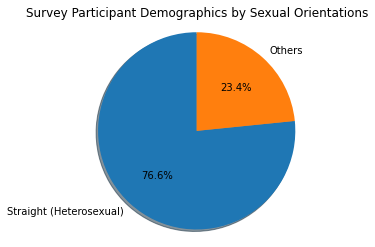

In [ ]:
for i in range(len(df['11'])):
    if df['11'][i] != "Straight (Heterosexual)":
        df['11'][i] = "Others"
temp = df['11'].value_counts().plot(kind="pie",autopct='%1.1f%%',
        shadow=True, startangle=90,title="Survey Participant Demographics by Sexual Orientations")
plt.axis('equal')
plt.axis('off')
plt.show()

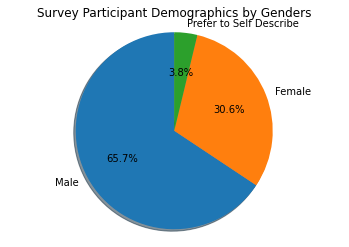

In [ ]:
df['9'] = df['9'].fillna('Prefer to Self Describe:')
df['9'].replace("Prefer to Self Describe:", "Prefer to Self Describe", inplace = True)
temp = df['9'].value_counts().plot(kind="pie",autopct='%1.1f%%',
        shadow=True, startangle=90,title="Survey Participant Demographics by Genders")
plt.axis('equal')
plt.axis('off')
plt.show()